## 2024.04.23 PlayData Data Engineering

### 머신러닝 기초  

#### 모집단과 통계적 추정
- 관측을 충분히 많이 하면 모집단의 모습을 상당히 선명하게 파악할 수 있다.
>   - 그렇지만 많은 관측을 하지 않고 모집단의 모습을 추측할 수 있어야 한다.
>   - 이것을 <span style="color:green;font-weight:bold">통계적 추정</span>이라고 말한다.

#### 통계적 추청
- 모집단이 정규 분포를 이룰 때 모집단에서 추출한 표본집단 역시 정규분포를 따르며 그 평균도 정규분포를 그대로 유지합니다.
>   - 표본평균 $ \bar x $  = 평균 $ u $ , 표본 표준 편차: $ \frac{\sigma}{\sqrt n} $
>   - 표본 분산은 정규분포를 따르지 않는다. (카이제곱 분포)

### 카이제곱 분포
- 표준 모 정규 분포에서 추출한 값과 모 평균과의 편차의 제곱의 합이 가지는 분포
- 추출한 값의 개수가 n이라고 할 때 자유도가 n-1 자유도인 카이제곱 분포를 따르게 됩니다.

### t분포
- 모집단이 정규분포 한다는 지식만 가지고 모수를 추정하였다.
- 모평균을 추정하기 위해서 나온 분포
- 데이터 샘플이 많아질 수록 정규분포를 따른다.
>   - $ T = \frac{x-u * \sqrt (n-1)}{s} $

### 가설검정
#### 가설검정의 절차**

    1. 가설 설정(귀무가설/대립가설)
    2. 가설 유의 수준 설정
    3. 가설 검증
    
####  t-test
   - 두 모집단 간의 평균의 차이가 없다는 귀무가설을 검증하는 테스트입니다.
   - 모 평균을 추정하기 위해서 나온 분포인 t 분포를 이용합니다.

---
깊이 있게 공부를 하기에는 시간이 부족하다는 것을 느꼈과
분포가 어떻게 쓰이는 지를 확인하고 검증된 지식을 가지고, 컴퓨터 공학에 맞는 기술을 갖추는 것이 필요합니다.

### To DO
- 부동산 데이터)t-test를 통하여 각각의 지역에서의 전 월세 데이터 값의 평균의 차이가 있다는 점을 확인
- 부동산 데이터)KNN 알고리즘을 통하여 주택 유형 분류(안심,LH&SH,) 모델을 구현




In [247]:
#t-test example : 주유소

import pandas as pd
import numpy as np # 계산 자체에 초점
import scipy as sc # 응용에 초점) numpy 선형대수 변환 이후 과학/공학적 계산을 위한 라이브러리

import glob

csv_list = list(glob.glob('./data/*.csv'))

engine_dfs = [pd.read_csv(x, encoding='cp949') for x in csv_list]
주유소 = pd.concat([engine_dfs[0],engine_dfs[1]])
주유소.상호.isin((주유소.groupby(by=['상호'])[['번호']].count() == 365).index)

0        True
1        True
2        True
3        True
4        True
         ... 
91119    True
91120    True
91121    True
91122    True
91123    True
Name: 상호, Length: 181714, dtype: bool

In [228]:
주유소['월'] = 주유소['기간'].apply(lambda x: str(x)[4:6])

폐업 = 주유소[['월','주소']].drop_duplicates().groupby(by=['월'])[['주소']].count()

폐업['현황'] = 폐업.주소 - 폐업.주소.shift(1)

폐업.fillna(0).rename(columns={'주소':'집계', '현황':'폐업갯수'}).reset_index()

,월,집계,폐업갯수
0,01,508,0.0
1,02,508,0.0
2,03,503,-5.0
3,04,501,-2.0
4,05,501,0.0
5,06,499,-2.0
6,07,500,1.0
7,08,499,-1.0
8,09,499,0.0
9,10,499,0.0


In [230]:
# 각 지역별 휘발유 평균 가격
주유소.groupby(by=['지역'])[['휘발유']].mean().reset_index()


,지역,휘발유
0,서울 강남구,1713.093581
1,서울 강동구,1576.685264
2,서울 강북구,1453.517525
3,서울 강서구,1488.818088
4,서울 관악구,1518.128564
5,서울 광진구,1490.597054
6,서울 구로구,1525.410383
7,서울 금천구,1477.121992
8,서울 노원구,1531.221551
9,서울 도봉구,1494.171062


In [252]:
강남구 = 주유소[주유소['지역'] == '서울 강남구']
도봉구 = 주유소[주유소['지역'] == '서울 도봉구']

도봉구.head(3)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
34210,A0009647,서울 도봉구,(주)소모에너지엔테크놀러지 신중계주유소,서울 도봉구 방학로 21 (방학동),20190101,GS칼텍스,일반,0,1398,1296,1200
34211,A0009647,서울 도봉구,(주)소모에너지엔테크놀러지 신중계주유소,서울 도봉구 방학로 21 (방학동),20190102,GS칼텍스,일반,0,1398,1296,1200
34212,A0009647,서울 도봉구,(주)소모에너지엔테크놀러지 신중계주유소,서울 도봉구 방학로 21 (방학동),20190103,GS칼텍스,일반,0,1398,1296,1200


In [250]:
sc.stats.ttest_ind(a = 강남구.groupby(by=['상호'])[['휘발유']].mean().values, b = 도봉구.groupby(by=['상호'])[['휘발유']].mean().values)

TtestResult(statistic=array([4.88857177]), pvalue=array([8.39772049e-06]), df=array([58.]))

In [ ]:
sc.stats.ttest_ind(a = 강남구.groupby(by=['상호'])[['휘발유']].mean().values, b = 도봉구.groupby(by=['상호'])[['휘발유']].mean().values)

In [80]:
주유소.head(3)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0


In [3]:
import sqlalchemy
from urllib import parse
import pandas as pd

user = 'david'
password = '392766'
host='172.30.240.1'
port = 3306
database = 'encore'
password = parse.quote_plus(password)

engine = sqlalchemy.create_engine(f"mysql://{user}:{password}@{host}:{port}/{database}")

In [40]:
df = pd.read_sql('select * from order_products__prior',con=engine)
df['first'] = df['add_to_cart_order'].apply(lambda x : 1 if x == 1 else 0)
df2 = df.groupby(by=['product_id'], as_index=False)[['first']].sum()
df3 = df2.sort_values(by=['first'], ascending=False).reset_index(drop=True)
df3['rank'] = df3['first'].rank(ascending=False)

In [41]:
df3

,product_id,first,rank
0,24852,117,1.0
1,13176,62,2.0
2,27845,37,3.0
3,21137,31,4.0
4,21903,27,5.0
...,...,...,...
9283,18206,0,5587.0
9284,18208,0,5587.0
9285,18218,0,5587.0
9286,18226,0,5587.0


In [42]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [43]:
fish_data = [ [l,w] for l, w in zip(fish_length,fish_weight)]
fish_target = [1] * 35 + [0] * 14

In [46]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

In [49]:
train_input = fish_data[:35]
train_target = fish_target[:35]

test_input = fish_data[35:]
test_target = fish_target[35:]

In [50]:
kn.fit(train_input,train_target)
kn.score(test_input,test_target)

0.0

In [55]:
import numpy as np
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [56]:
train_input = input_arr[:35]
train_target = target_arr[:35]

test_input =  input_arr[35:]
test_target = input_arr[35:]

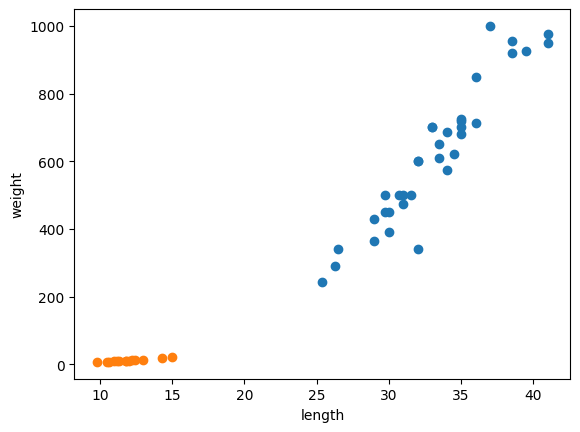

In [57]:
import matplotlib.pyplot as plt

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [64]:
fish_data = np.array(fish_data)

In [62]:
fish_target = np.concatenate((np.ones(35),np.zeros(14))) 

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

In [68]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [69]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [70]:
import matplotlib.pyplot as plt

In [79]:
kn.predict(test_input)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

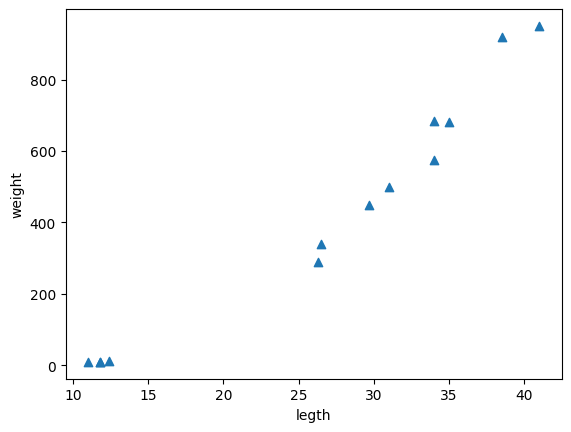

In [77]:
plt.scatter(test_input[:,0], test_input[:,1], marker='^')
plt.xlabel("legth")
plt.ylabel("weight")
plt.show()

회귀문제  
분류문제 -> 이진분류 문제  
knn 알고리즘 -> 하이퍼 파라미터  


KNN - 회귀 문제를 풀 수도 있다.

>   - 그런데 거의 안쓸듯..

EDA는 문제를 해결하기 이전에 사용한다.
> - 데이터를 숫자로만 보면 잘 보이지 않는다.
> - 그렇기 때문에 반드시 시각화 작업을 필요로 한다.

In [89]:
import numpy as np
# -1은 자유도가 없는 차원을 코드 상에서 정해준다.
np.arange(6).reshape(3,-1).ndim

2

결정계수
> - 실제 수식이 데이터를 얼마나 잘 표현되있는지를 점검하는 평가 지표 중 하나
> - R sqare 값이라 불린다.
> - Feature을 추가할 때마다 square 값이 올라간다.(종속변수와의 연관성이 없더라도 올라간다.)

> - $ 1 - \frac {(타깃-예측)^2의 합}{(타깃-평균)^2의 합} $

> - 